In [1]:
from utils_tables import *
import os 
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np

In [2]:
#Set-up
scal_folder="Res_Benchmark"
with cd(os.path.join(os.getcwd(),'..')):
    scal_path=os.path.join(os.path.join(os.getcwd(),scal_folder))
    assert os.path.isdir(scal_path), "Wrong folder"
#     print(scal_path)

# Table Results

In [3]:
table_files=[file for file in os.listdir(scal_path) if ".csv" in file]
metric_list=["Av_Best","Peak_Best","Eff_1"]
table_dict={}
for file in table_files:
    Dataset=file.split("Results_")[1].split(".csv")[0]
    df=pd.read_csv(os.path.join(scal_path,file))
    df["Dataset"]=df.apply(lambda row: Dataset, axis=1)
    df=normalise_metrics(df,metric_list)
    table_dict[Dataset]=df
    
benchmark_table=pd.concat(table_dict.values())



In [4]:
benchmark_table


,Imp,Av_Best,Peak_Best,Eff_1,NImprovements,Dataset,Av_Best_unit,Peak_Best_unit,Eff_1_unit
0,impr1,4387.779930,3895.232322,0.000012,75000,bcl380,0.000000,1.000000,0.028215
1,impr2,4227.381831,3494.901246,0.000012,73838,bcl380,0.063067,0.809676,0.006035
2,impr3,3169.561898,2789.025778,0.000014,74801,bcl380,0.478990,0.474091,0.093729
3,impr4,2423.142607,2161.141950,0.000019,34817,bcl380,0.772474,0.175584,0.345604
4,impr5,1844.474652,1791.816123,0.000034,20981,bcl380,1.000000,0.000000,1.000000
5,NaN,4383.929057,3847.624384,0.000011,0,bcl380,0.001514,0.977366,0.000000
0,impr1,687.093345,659.816152,0.000105,26181,belgiumtour,0.685737,0.000000,0.501595
1,impr2,699.778457,677.713249,0.000100,20865,belgiumtour,0.221742,0.921356,0.235906
2,impr3,678.501729,669.446300,0.000107,22224,belgiumtour,1.000000,0.495767,0.586702
3,impr4,701.793899,679.240890,0.000102,15415,belgiumtour,0.148021,1.000000,0.348294


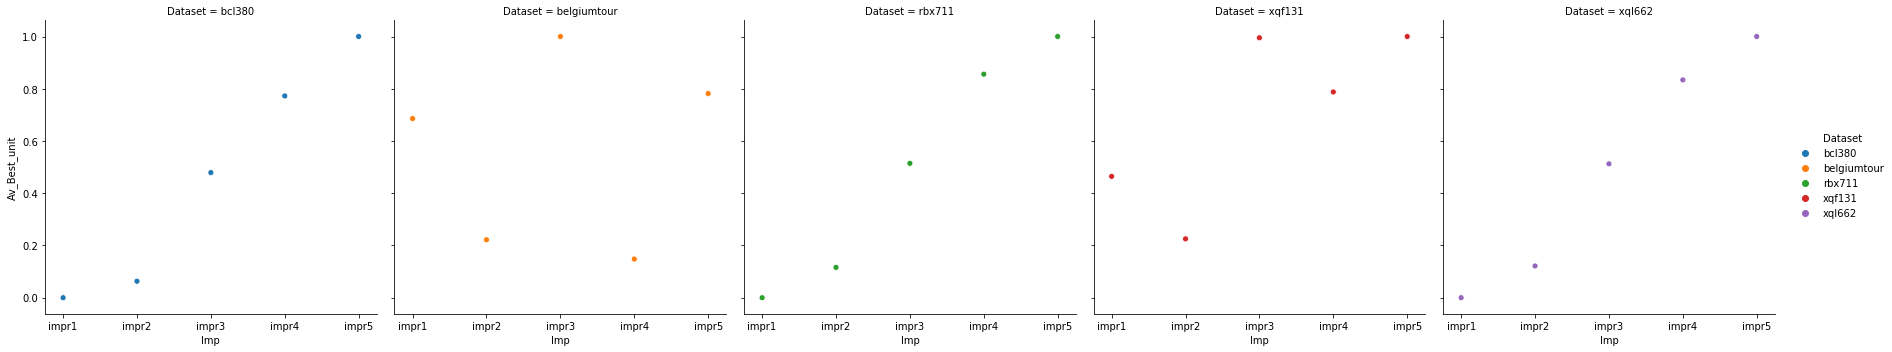

In [30]:
sns.relplot(x="Imp", y="Av_Best_unit", hue="Dataset",col="Dataset" ,data=benchmark_table);

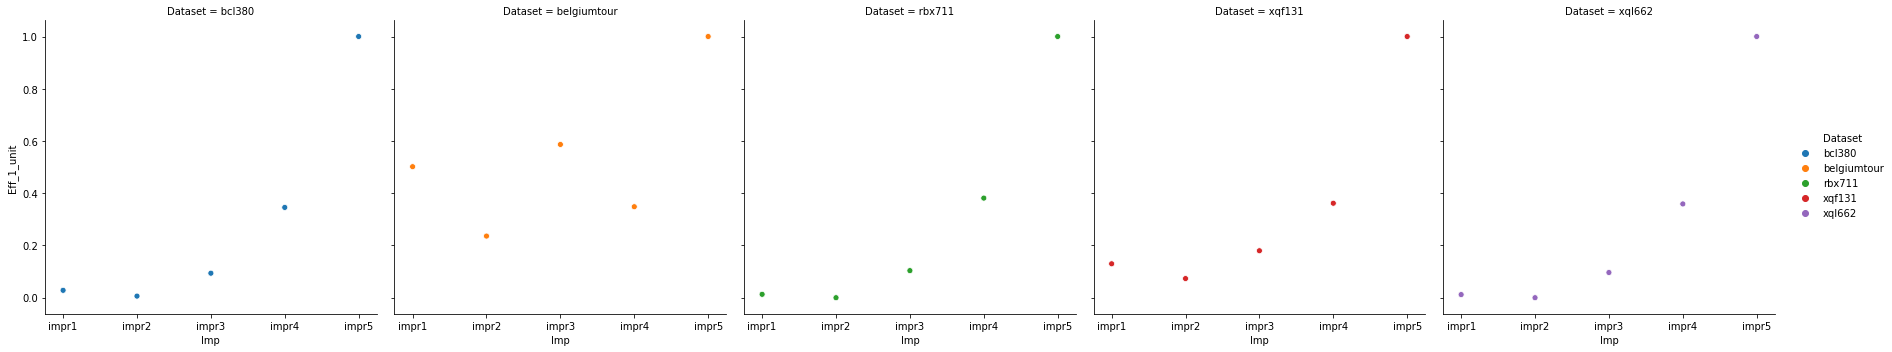

In [32]:
sns.relplot(x="Imp", y="Eff_1_unit", hue="Dataset",col="Dataset" ,data=benchmark_table);

# Running Results

In [7]:
ts_files=[file for file in os.listdir(scal_path) if ("Running_Res" in file) and  (".mat" in file)]
dict_ts={}

for el in zip(ts_files,table_dict.keys()):
    file=el[0]; Dataset=el[1]
    dict_ts[Dataset]=load_matlab_ts(file,scal_path,Heur=True)


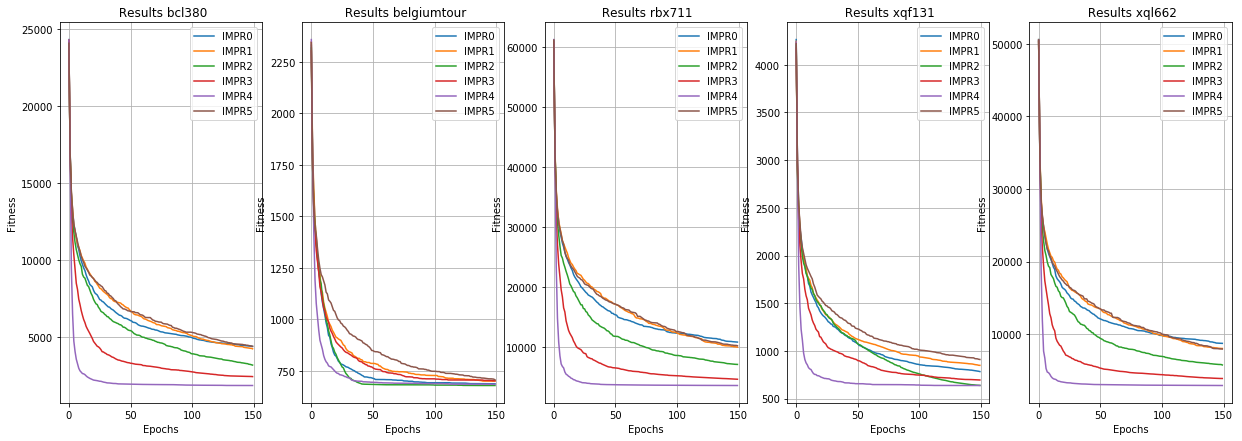

In [10]:
fig, axs = plt.subplots(1, len(table_dict.keys()), sharex=True, sharey=False,figsize=(21,7))

for i,Dataset in enumerate(dict_ts.keys()):
    plot_ts_scal(Dataset,dict_ts,axs[i])

In [43]:
fig, axs = plt.subplots(1, 4, sharex=True, sharey=False,figsize=(21,7))

for i,Dataset in enumerate(dict_ts.keys()):
    plot_ts_scal(Dataset,dict_ts,axs[i])

,epoch,IMPR0,IMPR1,IMPR2,IMPR3,IMPR4,BaseLine
0,0,24304.313403,24270.605559,24089.040584,24250.822644,24278.436148,24063.803292
1,1,17009.841067,16825.780747,16877.337412,17023.690511,16789.290401,16986.905979
2,2,14393.110641,14389.910205,14012.062686,13178.991713,9507.264698,14410.998692
3,3,13247.304906,13273.210450,12577.538512,11454.905530,6494.543955,13125.533462
4,4,12348.253847,12216.098663,11788.372910,10337.696040,4731.507117,12308.383803
5,5,11888.448351,11842.426143,11136.405391,9437.228435,4052.687739,11897.140512
6,6,11475.805412,11425.246265,10668.325574,8484.856677,3554.736216,11536.682573
7,7,10923.163705,11032.505390,10335.633201,8080.402569,3250.046321,11192.976141
8,8,10679.451694,10824.276144,10008.044959,7452.664161,2966.399175,10818.152125
9,9,10252.704892,10594.616814,9756.199577,7106.308155,2800.178059,10554.477996


In [4]:
fit_ev=dict_ts["rondrit127"]["50"]

In [6]:
eff_str=[file for file in os.listdir(scal_path) if "Eff" in file]
dict_ts=import_ts_data(scal_path)

In [57]:
matfolder=scal_path
matfile=eff_str[0]

mat_str = loadmat(os.path.join(matfolder,matfile))

# # NIND_vector=[20,50,80,100,120]
items=[item for item in mat_str['Eff_structure'][0][0]]
eff_values=[items[0].flat[i] for i in range(items[0].shape[1])]

# # Data
#Create dict from ts data
ts_dict={}
ts_dict["epoch"]=range(eff_values[0].shape[1])

for i range(eff_values[]:
        ##Basic case /Stop criteria/Tuning case: each col is fit values for NIND 
        ts_dict["{0}".format(NIND)]=fit_values[i].flatten()

# # return pd.DataFrame(ts_dict)

In [64]:
eff_values

[array([[1.92454396e-03, 1.01869474e-03, 7.02584254e-04, 5.50046533e-04,
         4.59128879e-04, 3.95077695e-04, 3.41003870e-04, 3.06703770e-04,
         2.77270955e-04, 2.52510586e-04, 2.35259451e-04, 2.16900891e-04,
         2.00916117e-04, 1.88201329e-04, 1.79631406e-04, 1.69974220e-04,
         1.60322685e-04, 1.51415869e-04, 1.44615263e-04, 1.38996875e-04,
         1.33505702e-04, 1.27950042e-04, 1.23251380e-04, 1.18115905e-04,
         1.14272207e-04, 1.10137038e-04, 1.06397966e-04, 1.02683402e-04,
         9.93075578e-05, 9.59973059e-05, 9.29006186e-05, 8.99974743e-05,
         8.73521614e-05, 8.47829802e-05, 8.23606093e-05, 8.00728146e-05,
         7.79086845e-05, 7.58584560e-05, 7.39133673e-05, 7.20655332e-05,
         7.03078372e-05, 6.88559170e-05, 6.72546166e-05, 6.57261026e-05,
         6.42655225e-05, 6.28684459e-05, 6.15308194e-05, 6.02489274e-05,
         5.90193574e-05, 5.78389703e-05]]),
 array([[1.91890270e-03, 1.03294724e-03, 7.32512084e-04, 5.60208079e-04,
       

range(0, 50)

In [8]:
def calc_eff(fit_ev):
    fn=[]
#     fn.append(fit_ev[0])
    delta_fn=[]
    step=10
    
    for i in range(1,len(fit_ev)):
        fn.append(fit_ev[i]-fit_ev[i-1])
            
#             delta_fn.append(fn[0]-fn[-1])
        
    return fn

            

In [15]:
eff={};idx={}
for Dataset in dict_ts.keys():
    fit_ev=dict_ts[Dataset]["50"]
    eff[Dataset]=calc_eff(fit_ev)
    idx[Dataset]=[i for i,el in enumerate(eff) if el==0]
    
 
    
    

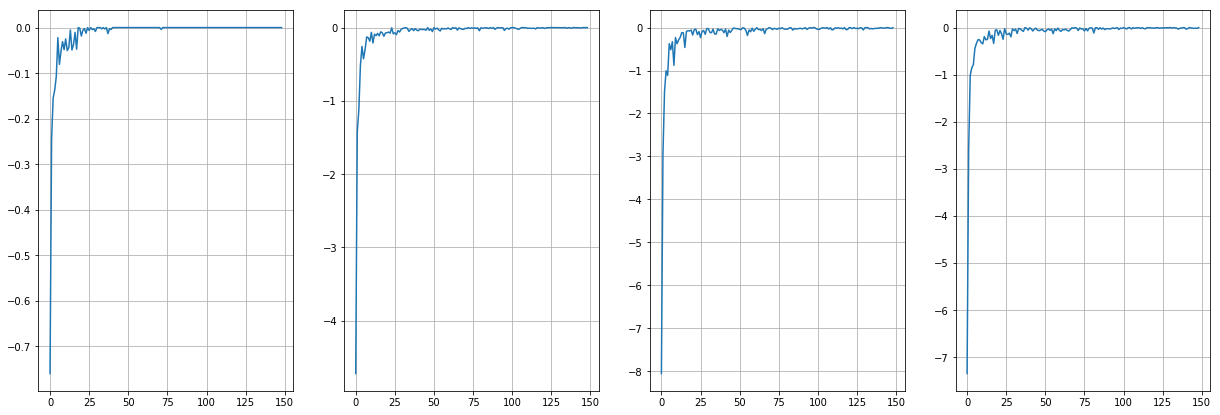

In [17]:
fig, axs = plt.subplots(1, 4, sharex=True, sharey=False,figsize=(21,7))

for i,Dataset in enumerate(dict_ts.keys()):
#     plot_ts_scal(Dataset,dict_ts,axs[i])

    axs[i].plot(eff[Dataset])
    
    axs[i].grid(True)

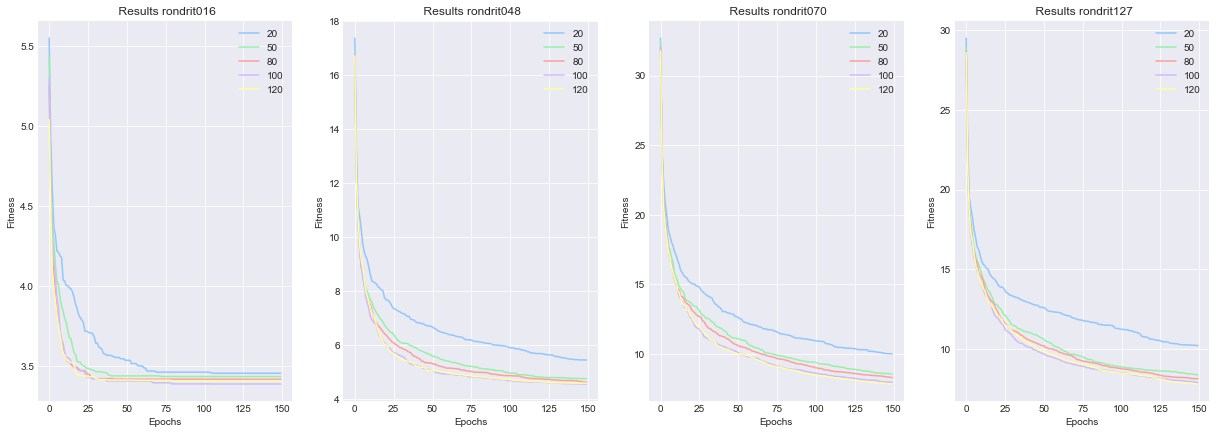

In [54]:
fig, axs = plt.subplots(1, 4, sharex=True, sharey=False,figsize=(21,7))

for i,Dataset in enumerate(dict_ts.keys()):
    plot_ts_scal(Dataset,dict_ts,axs[i])

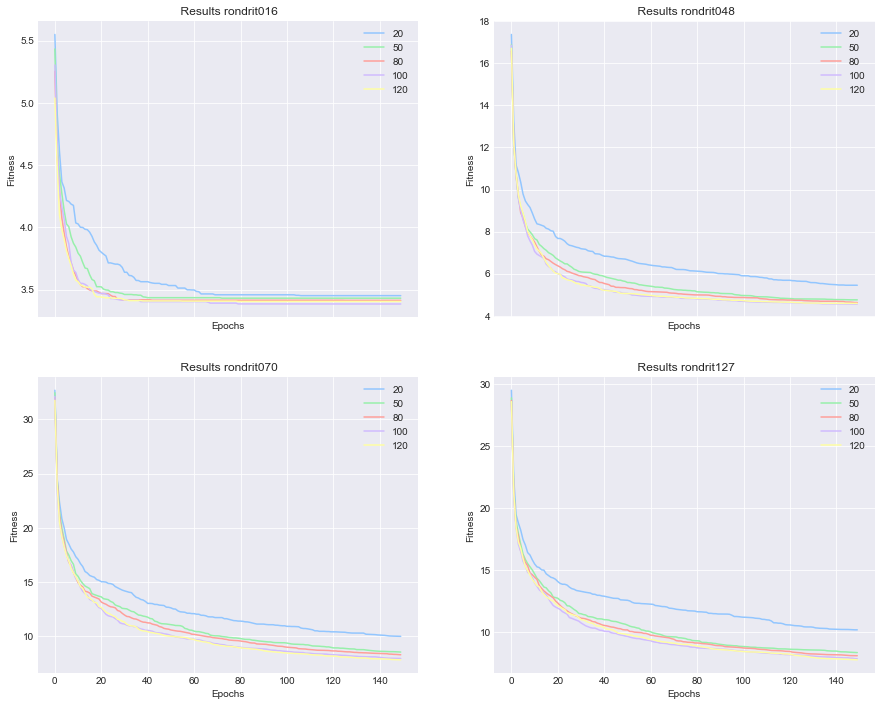

In [33]:
Dataset_list=["rondrit016","rondrit048","rondrit070","rondrit127"]

x = np.random.randn(50)
vert_plots=2
hor_plots=2
fig, axs = plt.subplots(hor_plots, vert_plots, sharex=True, sharey=False,figsize=(15,12))
cont=0

for i in range(hor_plots):
    for j in range(vert_plots):
        Dataset=Dataset_list[cont]

        plot_ts_scal(Dataset,ts_files,axs[i,j])
        cont+=1

        

# plt.show()

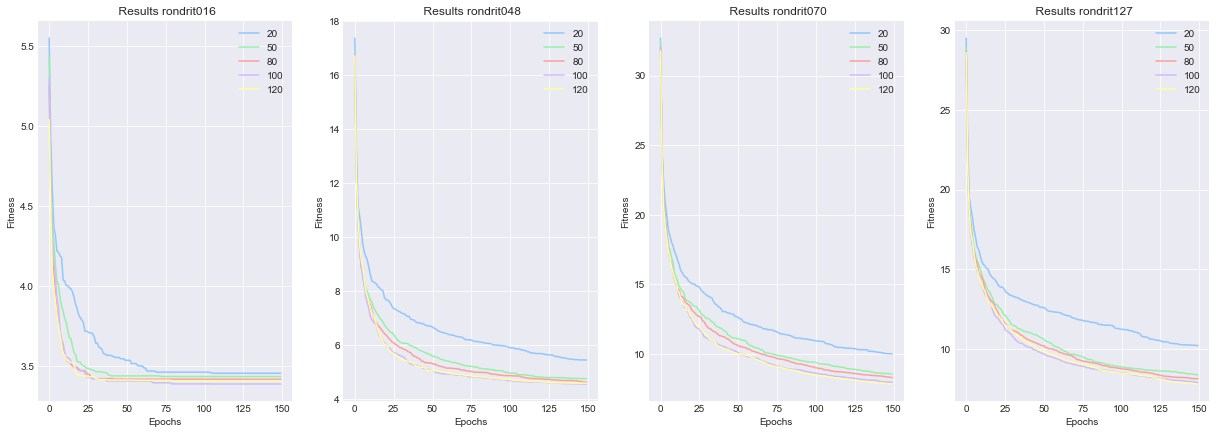

In [28]:
Dataset_list=["rondrit016","rondrit048","rondrit070","rondrit127"]

# new style method 2; use an axes array

fig, axs = plt.subplots(1, 4, sharex=True, sharey=False,figsize=(21,7))

for i,Dataset in enumerate(Dataset_list):
        plot_ts_scal(Dataset,ts_files,axs[i])
        
plt.show()


 # Plotting

In [ ]:
ts_df

In [ ]:
# # multiple line plot
# plt.plot( 'x', 'y_IMPR4', data=ts_df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=1)
# plt.plot( 'x', 'y_IMPR2', data=ts_df, marker='', color='olive', linewidth=1)
# plt.plot( 'x', 'y_IMPR5', data=ts_df, marker='', color='olive', linewidth=1, linestyle='dashed')

for col in df.columns:
    if(not(col=="x")):
        plt.plot( 'x', col, data=df, marker='', linewidth=1)
    
plt.legend()

In [ ]:
for col in ts_df.columns:
    if(not(col=="x")):
        plt.plot( 'x', col, data=ts_df, marker='', linewidth=1)
    
plt.legend()